In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/'My Drive'/LungCancerDataset

/content/drive/My Drive/LungCancerDataset


In [ ]:
!ls

 data			'Exp-2 6 Conv2D'			    test
 data_FastAI-18.ipynb	'Exp3-Transfer Learning with InceptionV3'
'Exp-1 5 Conv2D.ipynb'	 models


In [ ]:
# !unzip data.zip

In [ ]:
# !ls

In [ ]:
!ls

 data			'Exp-2 6 Conv2D'			    test
 data_FastAI-18.ipynb	'Exp3-Transfer Learning with InceptionV3'
'Exp-1 5 Conv2D.ipynb'	 models


In [ ]:
#Importing suppourtive libraries for this task
import os
import sys
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
#for image manipulation
import cv2
import glob
import numpy as np

In [ ]:
#Pytorch, FastAI & Matplotlib
import torch 
import torchvision
from fastai.callbacks import *
from fastai.vision import *
from fastai.metrics import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
bs = 16  #batch size
sz = 224 #image dimentions
PATH = './data/train'

In [ ]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes) 

There are  3 classes:
 ['Benign', 'SquamousCellCarcinoma', 'Adenocarcinoma']


In [ ]:
# for c in classes:
#     print ("Class:", c)
#     verify_images(os.path.join(PATH, c), delete=True);

In [ ]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

In [ ]:
print ("Train Images: ", len(data.train_ds), " validation images: ", len(data.valid_ds) )

Train Images:  7208  validation images:  1802


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

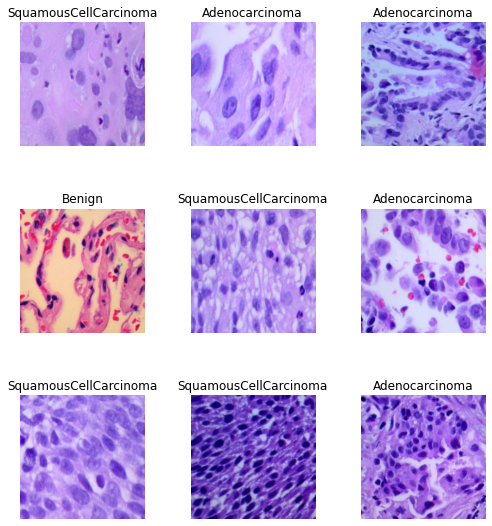

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,accuracy,time


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


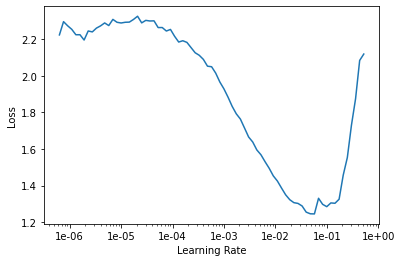

In [ ]:
learn.lr_find();
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(25, max_lr=slice(1e-03,1e-02))

epoch,train_loss,valid_loss,accuracy,time
0,0.283637,0.109431,0.961709,27:27
1,0.212934,0.063013,0.975583,06:57
2,0.194270,0.081769,0.968368,07:03
3,0.139687,0.050918,0.982242,07:03
4,0.192164,0.073155,0.980577,07:05
5,0.156896,0.037532,0.987791,07:07
6,0.145493,0.060974,0.975028,07:07
7,0.155579,0.338485,0.986127,07:08
8,0.113334,0.092309,0.980577,07:10
9,0.116678,0.279347,0.980022,07:11


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default

epoch,train_loss,valid_loss,accuracy,time
0,0.283637,0.109431,0.961709,27:27
1,0.212934,0.063013,0.975583,06:57
2,0.194270,0.081769,0.968368,07:03
3,0.139687,0.050918,0.982242,07:03
4,0.192164,0.073155,0.980577,07:05
5,0.156896,0.037532,0.987791,07:07
6,0.145493,0.060974,0.975028,07:07
7,0.155579,0.338485,0.986127,07:08
8,0.113334,0.092309,0.980577,07:10
9,0.116678,0.279347,0.980022,07:11


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3658: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default

In [ ]:
# interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix()
conf=interp.confusion_matrix()
TrueNagitive=conf[0][0]
FalseNegative=conf[0][1]
TruePositive=conf[1][1]
FalsePositive=conf[1][0]
recal=TruePositive/(TruePositive+FalseNegative)
accuracy = (TrueNagitive + TruePositive) / (TruePositive+TrueNagitive+FalseNegative+FalsePositive)
precision=TruePositive/(TruePositive+FalsePositive)
print("Precision: ",precision,"Recall:  ", recal)
f1=2*((precision*recal)/(precision+recal))
print('F1 Score:  =',f1)
print("Accuracy: =",accuracy)

Precision:  0.8611111111111112 Recall:   0.9207920792079208
F1 Score:  = 0.8899521531100479
Accuracy: = 0.8940092165898618


In [ ]:
from sklearn import metrics
preds,y, loss = learn.get_preds(with_loss=True)

In [ ]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 0.9382353534741983


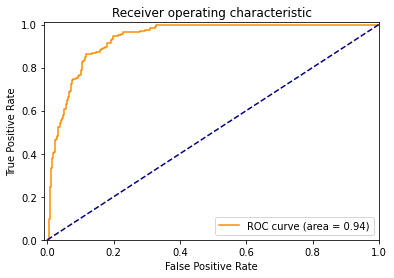

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")